In [2]:
import pandas as pd
url='50_Startups.csv'
data = pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


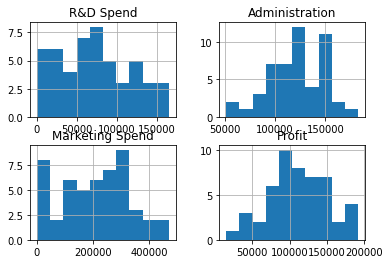

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [4]:
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<Axes: >

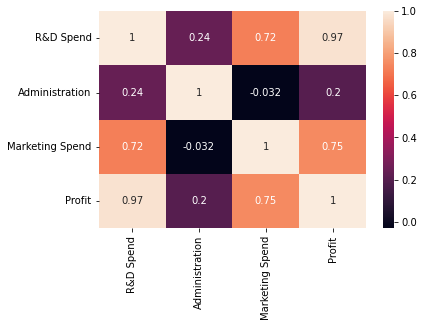

In [5]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Profit', ylabel='R&D Spend'>

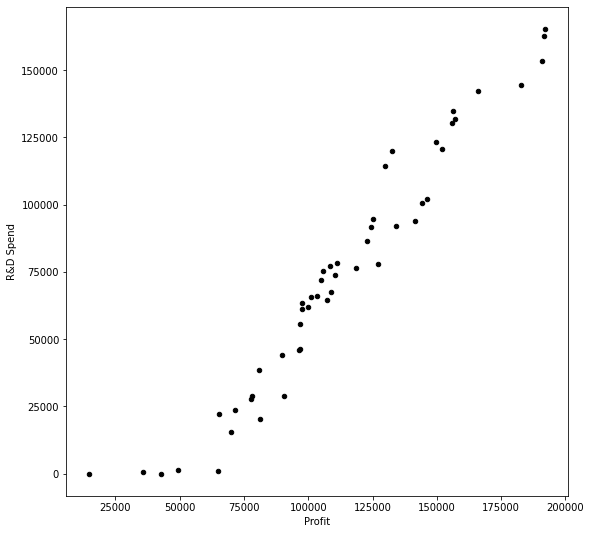

In [6]:
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='black')

In [7]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])
print('Giá trị Intercept là:',model.intercept_)
print('Giá trị Coeficent là:',model.coef_)

Giá trị Intercept là: -50385.82883510302
Giá trị Coeficent là: [1.10797715]


In [8]:
model.score(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])

0.9465353160804393

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


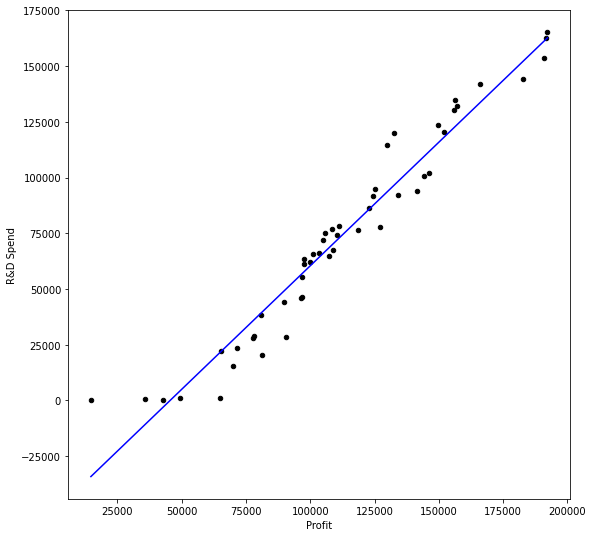

In [9]:
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='black')
y_pred=model.predict(X=pd.DataFrame(data['Profit']))
plt.plot(data['Profit'],y_pred,color='blue')

In [10]:
model=linear_model.LinearRegression()
X=pd.DataFrame([data['Profit'],data['Profit']**2]).T
model.fit(X,y=data['R&D Spend'])
print('Hệ số Intercept là :',model.intercept_)
print('Hệ số Coefficient là :',model.coef_)
print('Độ chính xác của mô hình:',model.score(X,y=data['R&D Spend']))

Hệ số Intercept là : -37182.30912423563
Hệ số Coefficient là : [8.39353178e-01 1.19427444e-06]
Độ chính xác của mô hình: 0.9497292340096265


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


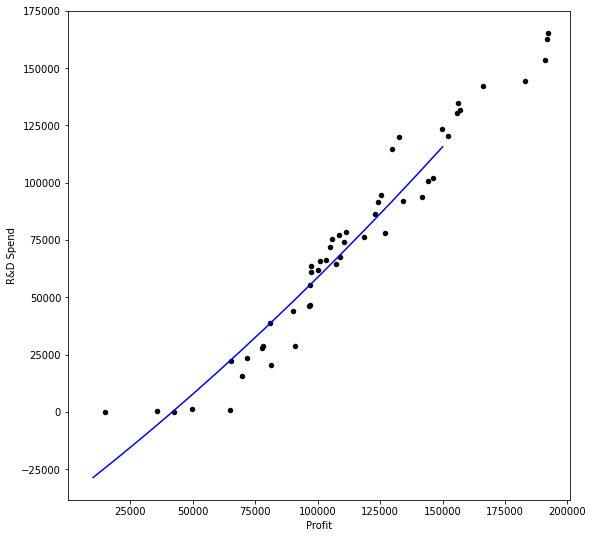

In [11]:
import numpy as np
range=np.arange(10000,160000,10000)
X_range=pd.DataFrame([range,range**2]).T
y_pred=model.predict(X_range)
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='black',xlim=(0.7))
plt.plot(range,y_pred,color='blue')